In [842]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

In [843]:
df = pd.read_csv(r"C:\MasterThesis\v1.0\sEEG_dataset.csv")
print(df.head())
print(df.shape)
df = df.dropna()
print(df.shape)

labels = df['labels']
df = df.drop(df.columns[-1], axis=1)
X = df
y = labels

          0         1         2         3         4         5         6  \
0 -1.379356 -1.391036 -1.403158 -1.415720 -1.428722 -1.442164 -1.456044   
1  5.451684  5.472734  5.493559  5.514158  5.534532  5.554680  5.574601   
2  1.882313  1.890693  1.898870  1.906845  1.914620  1.922196  1.929572   
3  8.175729  8.178365  8.180737  8.182844  8.184688  8.186269  8.187587   
4 -3.818025 -3.832569 -3.847524 -3.862893 -3.878675 -3.894872 -3.911485   

          7         8         9  ...  77990  77991  77992  77993  77994  \
0 -1.470361 -1.485114 -1.500301  ...    NaN    NaN    NaN    NaN    NaN   
1  5.594296  5.613765  5.633006  ...    NaN    NaN    NaN    NaN    NaN   
2  1.936750  1.943732  1.950517  ...    NaN    NaN    NaN    NaN    NaN   
3  8.188642  8.189436  8.189968  ...    NaN    NaN    NaN    NaN    NaN   
4 -3.928515 -3.945962 -3.963828  ...    NaN    NaN    NaN    NaN    NaN   

   77995  77996  77997  77998  77999  
0    NaN    NaN    NaN    NaN    NaN  
1    NaN    NaN    N

In [844]:
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [845]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [846]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [847]:
# tworzenie modelu
model = LogisticRegression(max_iter=1000)

In [848]:
# trenowanie modelu
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [849]:
# przewidywanie na danych testowych
predictions = model.predict(X_test)

In [850]:
# sprawdzanie dokładności modelu
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy*100}%")

Accuracy: 90.09009009009009%


In [851]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [852]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

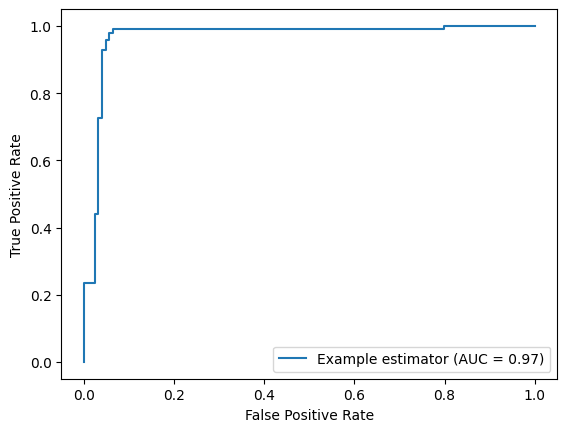

In [853]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example estimator')
display.plot()
plt.show()

Text(0.5, 1.0, 'CONFUSION MATRIX')

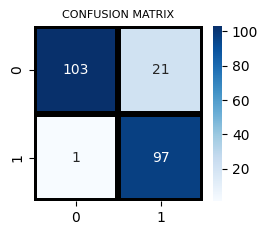

In [854]:
#Confusion matrix
plt.figure(figsize=(6,5))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="Blues",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=8)